<h1 align=center><font size = 5> Stock Market Analysis</font></h1> 

# Stock Market Analysis and Prediction using LSTM 

Time series data refers to a collection of data points that are arranged in chronological order. It is a crucial aspect for data analysts and data scientists to manipulate time series data due to its prevalence in various domains.

Within this notebook, we will explore and analyze data from the stock market, specifically focusing on technology stocks such as Apple, Amazon, Google, and Microsoft. By utilizing the yfinance library, we will retrieve stock information and employ Seaborn and Matplotlib to visualize different aspects of the data. Additionally, we will examine several methods for assessing the risk associated with a stock based on its historical performance. Furthermore, we will utilize a Long Short Term Memory (LSTM) approach to predict future stock prices.

Throughout this process, we aim to address the following inquiries:

How has the stock's price changed over time?
What is the average daily return of the stock?
What is the moving average of the various stocks?
What is the correlation between different stocks?
What is the level of risk involved in investing in a specific stock?
 How can we make an attempt to forecast future stock behavior? (Specifically, predicting the closing price of Apple Inc. using LSTM).

#  Import Libraries

importing the necessary Python libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime



# Importing Data Sets 

Our initial task involves acquiring the data and storing it in memory. We will source our stock data from the Yahoo Finance website, a valuable repository of financial market information and resources for identifying promising investments. Utilizing the yfinance library, we can efficiently retrieve market data from Yahoo Finance in a threaded and Pythonic manner. For further insights on yfinance, refer to the following article: Efficiently downloading historical market data using Python.

# Module 1: The change in price of the stock overtime

This section will cover the process of retrieving stock information using pandas, as well as examining fundamental characteristics of a stock.

In [2]:
# The tech stocks used for this analysis are
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-22,176.940002,178.869995,174.559998,177.229996,177.229996,37924900,AMAZON
2024-04-23,178.080002,179.929993,175.979996,179.539993,179.539993,37046500,AMAZON
2024-04-24,179.940002,180.320007,176.179993,176.589996,176.589996,34185100,AMAZON
2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400,AMAZON
2024-04-26,177.800003,180.820007,176.130005,179.619995,179.619995,43919800,AMAZON
2024-04-29,182.750000,183.529999,179.389999,180.960007,180.960007,54063900,AMAZON
2024-04-30,181.089996,182.990005,174.800003,175.000000,175.000000,94639800,AMAZON
2024-05-01,181.639999,185.149994,176.559998,179.000000,179.000000,94645100,AMAZON
2024-05-02,180.850006,185.100006,179.910004,184.720001,184.720001,54303500,AMAZON


## Descriptive Statistics about the Data

The .describe() function provides an analysis of descriptive statistics, summarizing central tendency, dispersion, and distribution shape of a dataset while excluding NaN values. It can analyze both numeric and object series, as well as DataFrame column sets with mixed data types. The output will differ based on the input provided. Please see the notes below for further information.

In [29]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02,241.000000,231.000000,201.000000,249.000000
mean,181.343280,182.804400,179.966120,181.427640,181.056282,5.815205e+07,181.367940,181.810696,182.716182,0.000324
std,8.619643,8.466845,8.589562,8.567850,8.507364,1.866779e+07,7.892933,7.152802,5.009924,0.012744
min,165.350006,166.399994,164.080002,165.000000,165.000000,2.404830e+07,168.306000,169.373499,172.388000,-0.048020
25%,173.662495,175.285004,172.252499,173.750000,173.484848,4.678172e+07,173.741116,175.024534,177.929885,-0.006999
50%,180.949997,182.384995,179.004997,180.849998,180.245216,5.368500e+07,181.296053,180.625698,183.393916,0.000518
75%,189.312500,189.990005,187.737499,189.352497,188.939705,6.448900e+07,188.796436,188.235807,186.490540,0.007904
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.632241e+08,195.708270,194.060874,190.681884,0.059701


there is  255 records in one year because weekends are not included in the data.

## Data information

The .info() function displays details about a DataFrame such as the index data type, column names, number of non-null values, and memory usage.

In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-05-08 to 2024-05-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price

The Closing Price is the most recent price at which the stock is exchanged during the typical trading day. Investors rely on a stock's closing price as the primary indicator to monitor its progress throughout time.

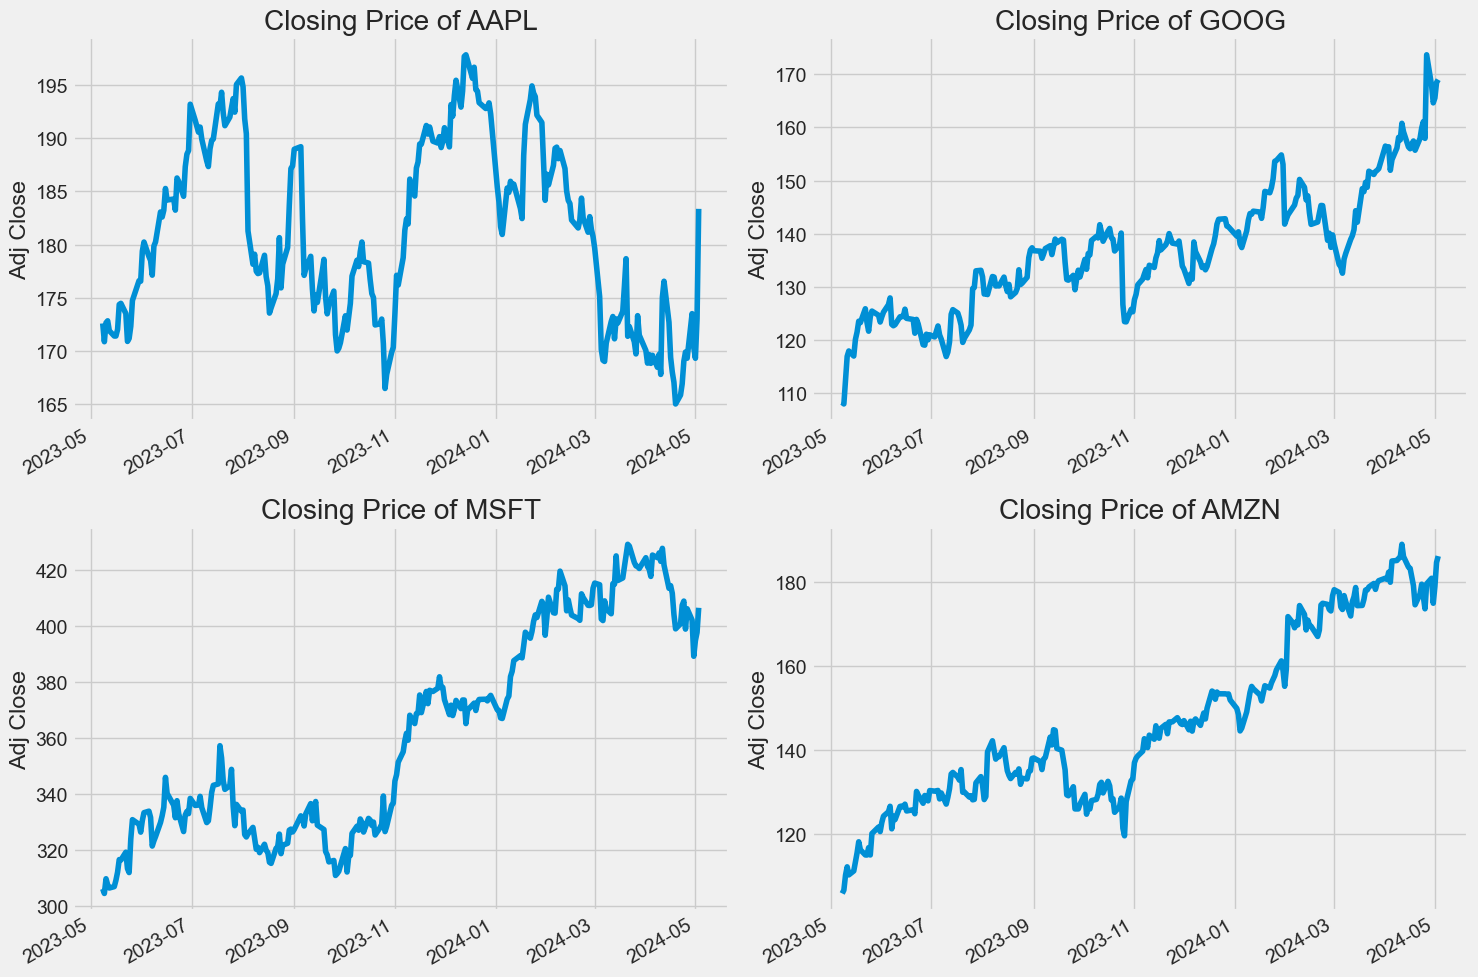

In [5]:
# historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales

Volume represents the quantity of a particular asset or security that is bought and sold within a specific timeframe, typically within a single day. For example, stock trading volume indicates the total number of shares of a security that are exchanged between the opening and closing of the market. Monitoring trading volume and its fluctuations is crucial for technical traders to make informed decisions.

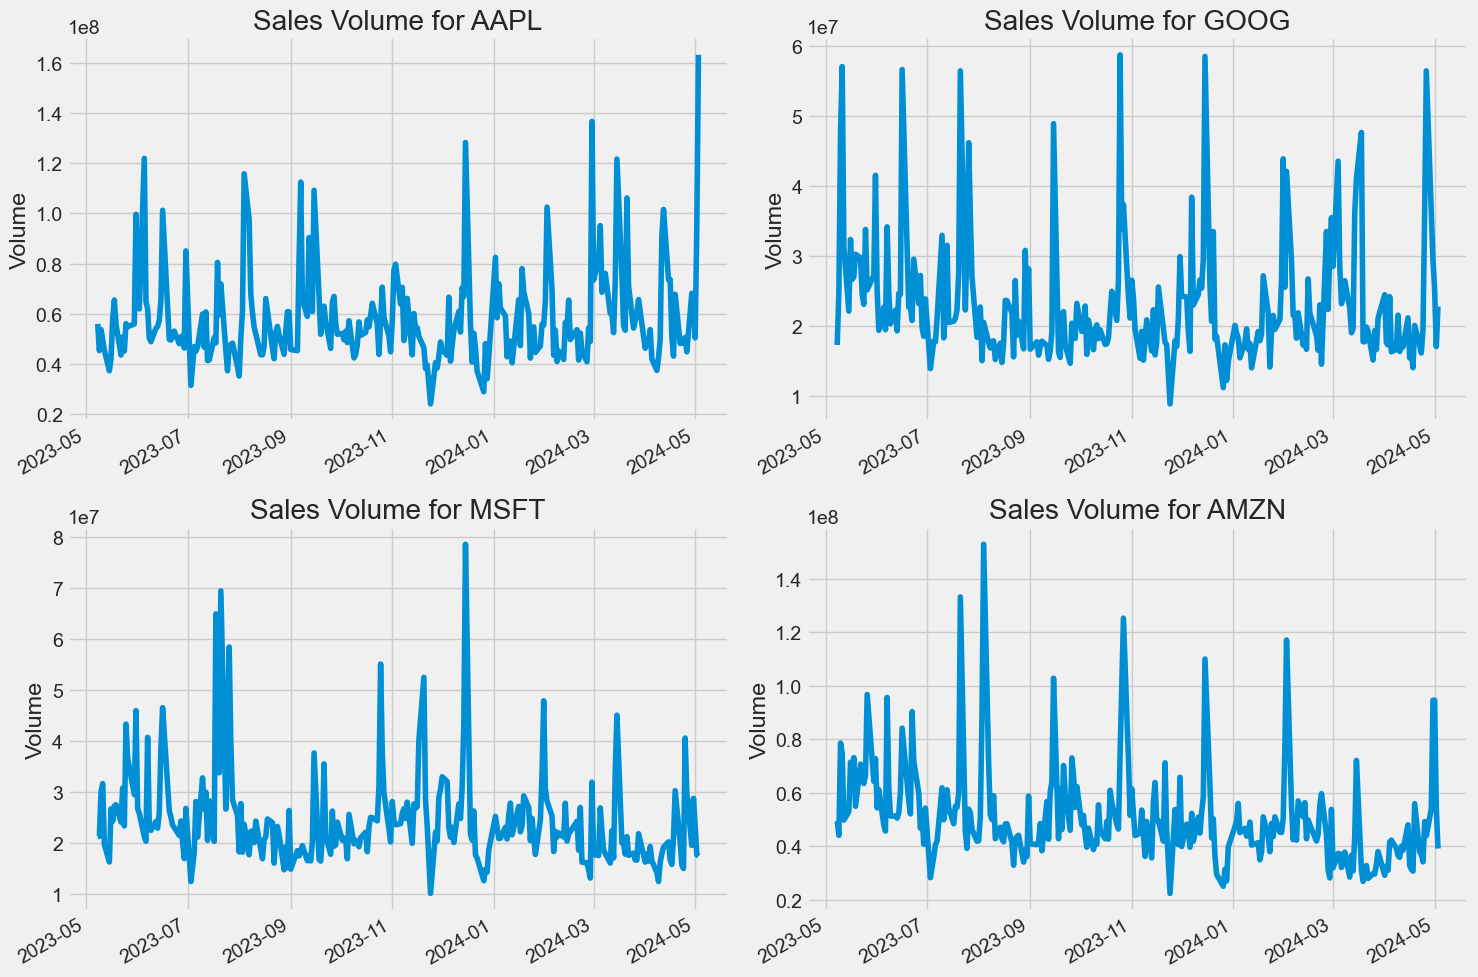

In [6]:
# the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

After reviewing the visual representations of the closing price and daily trading volume, we can proceed with calculating the stock's moving average.

# Module 2: The moving average of the various stocks

The moving average (MA) is a straightforward tool used in technical analysis to smoothen price data by continuously calculating an average price. This average is calculated over a designated time period, such as 10 days, 20 minutes, 30 weeks, or any timeframe chosen by the trader.

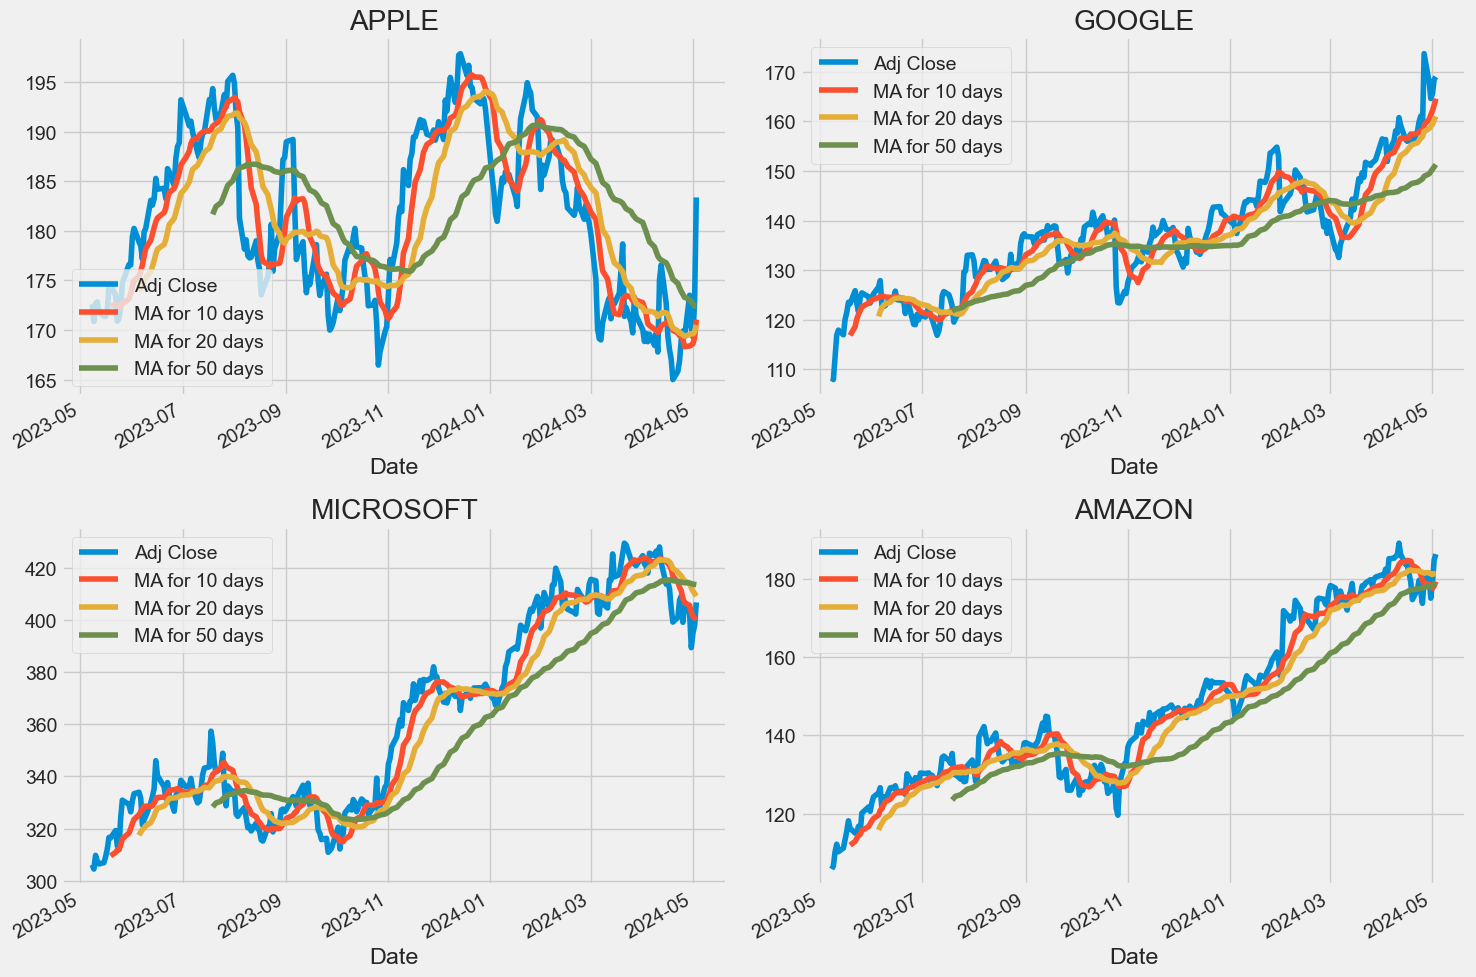

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Module 3: The daily return of the stock on average

After completing the initial analysis, it is time to delve further into the subject. Our next step involves assessing the risk associated with the stock. To accomplish this, we must closely examine the daily fluctuations of the stock rather than solely focusing on its overall value. To retrieve the daily returns for the Apple stock, we will utilize pandas. Let's proceed with this approach.

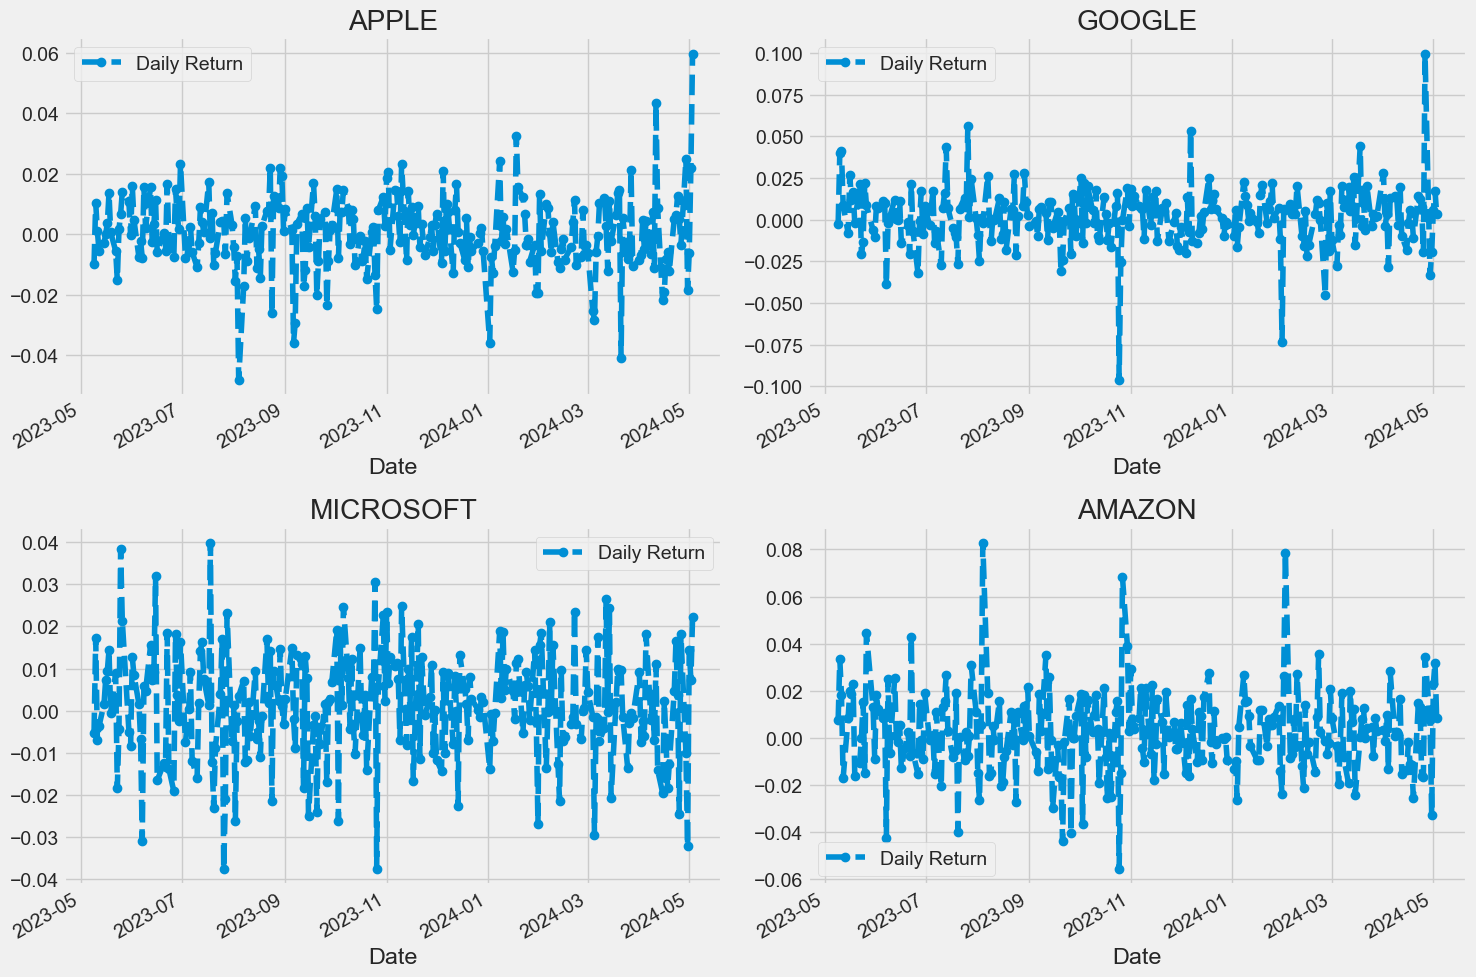

In [8]:
# pct_change used  to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We will now analyze the average daily return in detail by creating a histogram. To do this, we will use seaborn to produce both a histogram and kde plot together in one graph.

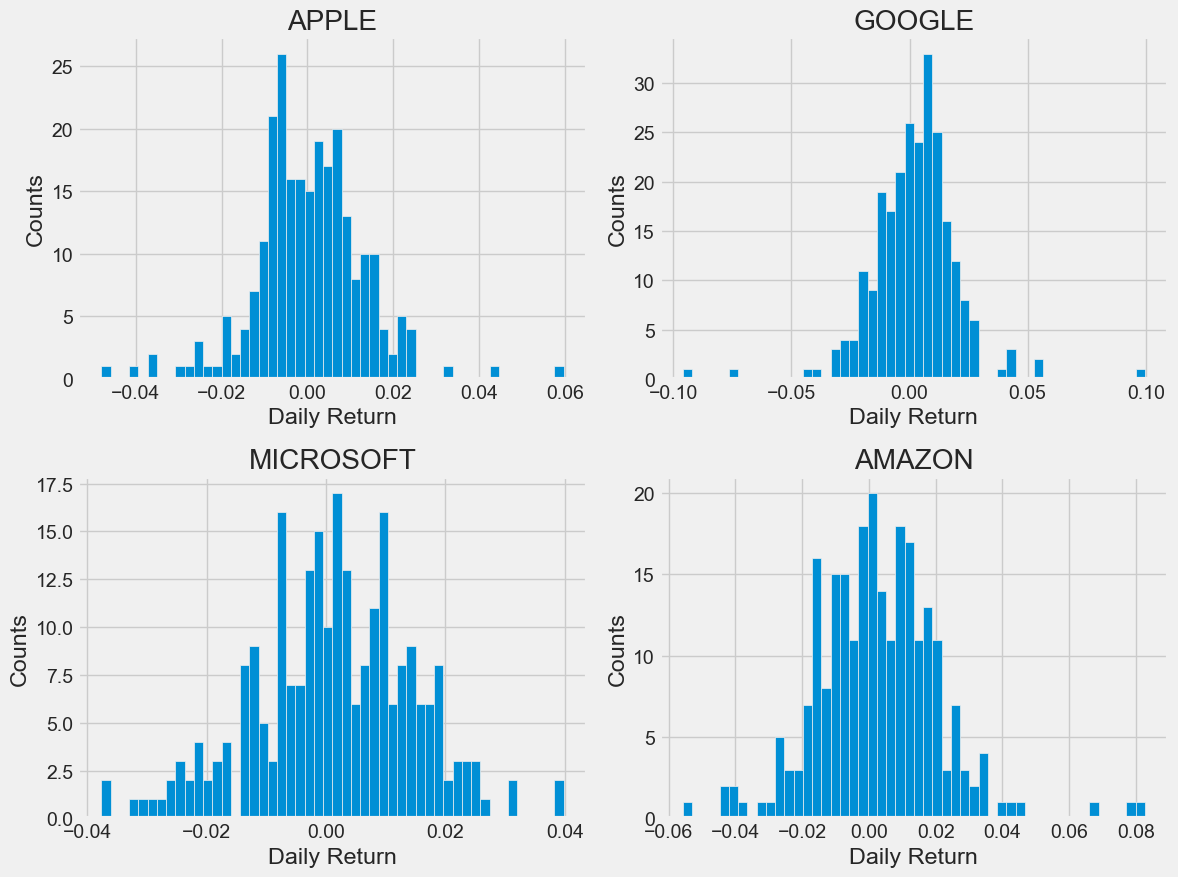

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# Module 4: The correlation between different stocks closing prices?

When analyzing the returns of all the stocks in our list, we can create a DataFrame that includes the 'Close' columns from each of the individual stock dataframes. This allows us to effectively compare and study the performance of each stock in relation to the others.

In [10]:
# Compile all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-05-08,NaN,NaN,NaN,NaN
2023-05-09,-0.009971,0.007465,-0.002772,-0.005346
2023-05-10,0.010421,0.033483,0.040207,0.017296
2023-05-11,0.001095,0.018060,0.041147,-0.007044
2023-05-12,-0.005418,-0.017115,0.008725,-0.003676


Let's examine the correlation between the daily percentage returns of two stocks to determine their level of correlation. Initially, we will analyze a stock in relation to itself.

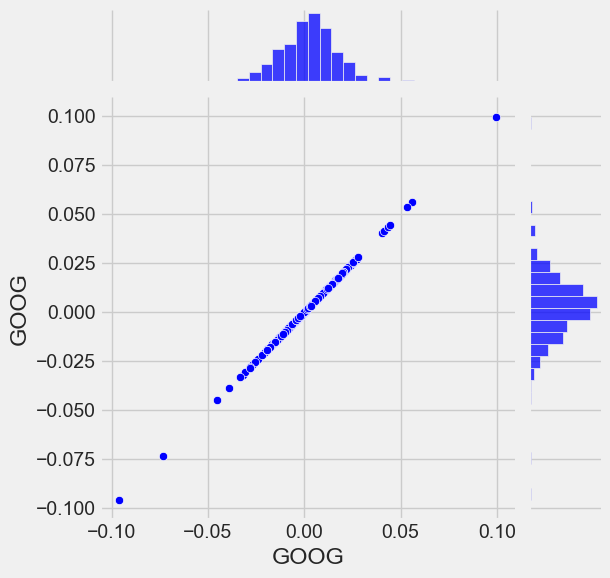

In [33]:
# Comparing Google to itself 
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='blue')

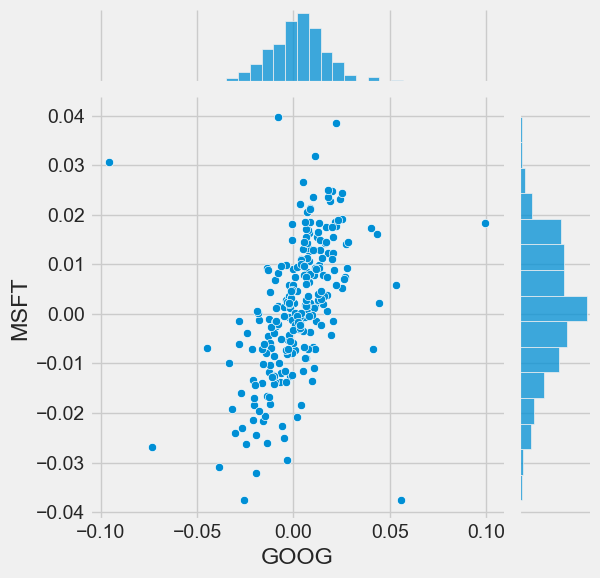

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

It is evident that when two stocks exhibit a perfect (and positive) correlation, there will be a linear relationship between their daily return values. Seaborn and pandas provide a convenient way to perform this comparative analysis for all potential combinations of stocks in our technology stock ticker list. By utilizing sns.pairplot(), we can effortlessly generate this plot.

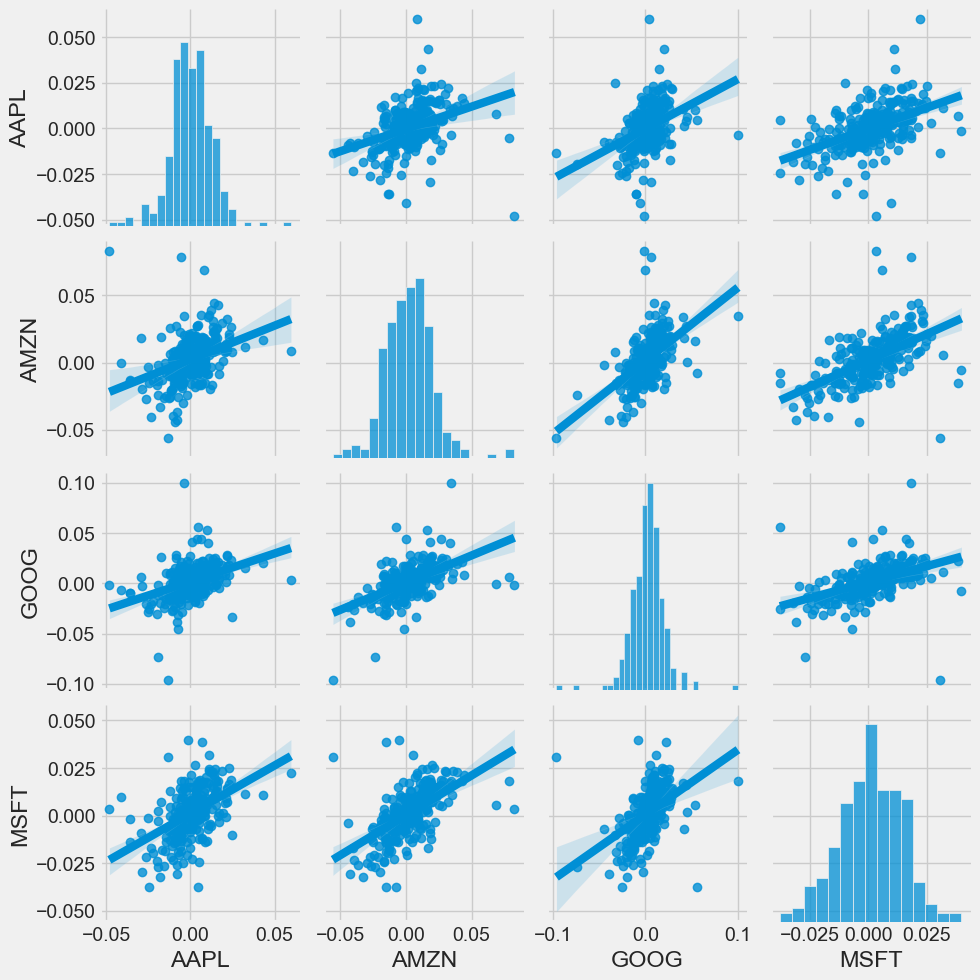

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

We possess an extensive understanding of the connections in daily returns among all stocks. A preliminary examination uncovers a significant correlation between the daily returns of Google and Amazon. Delving deeper into this particular comparison could provide valuable insights.

While sns.pairplot() provides a convenient solution, we can choose to utilize sns.PairGrid() for greater flexibility in customizing the figure. This includes determining the types of plots in the diagonal, upper triangle, and lower triangle. The following example showcases how we can leverage seaborn's capabilities to achieve this objective.

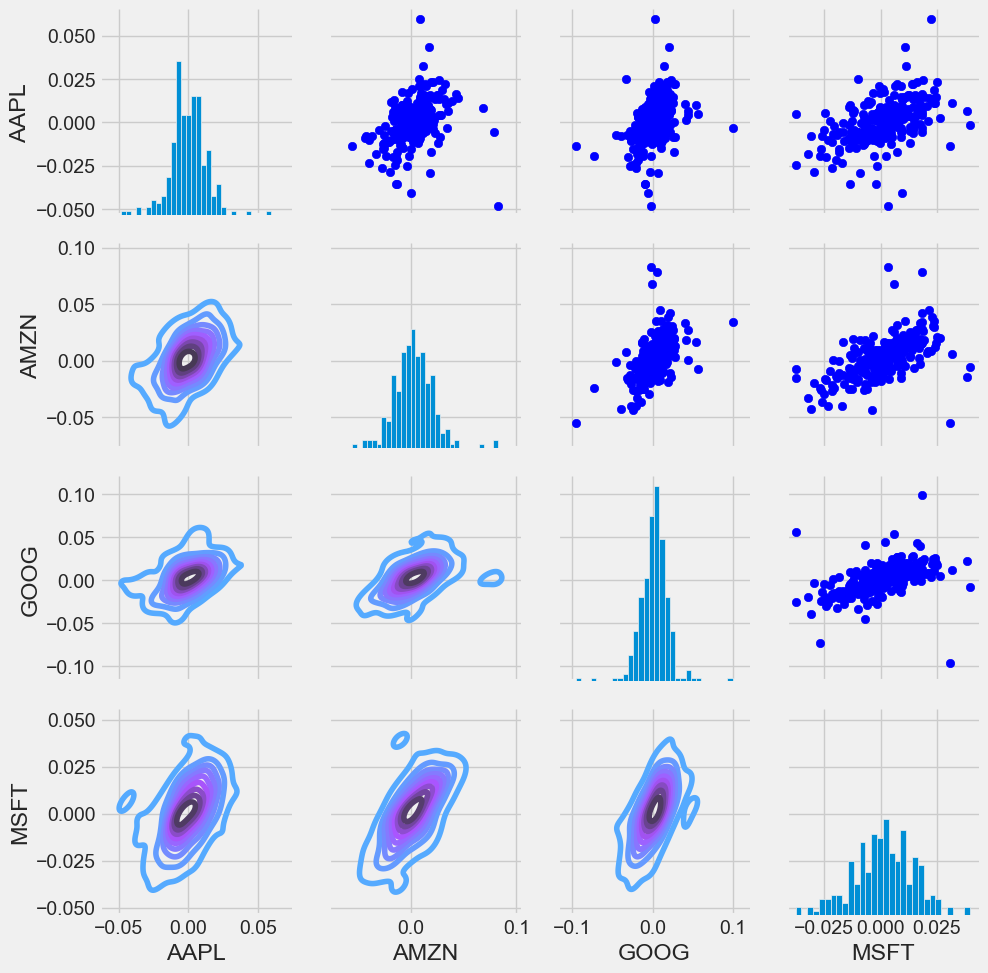

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='blue')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

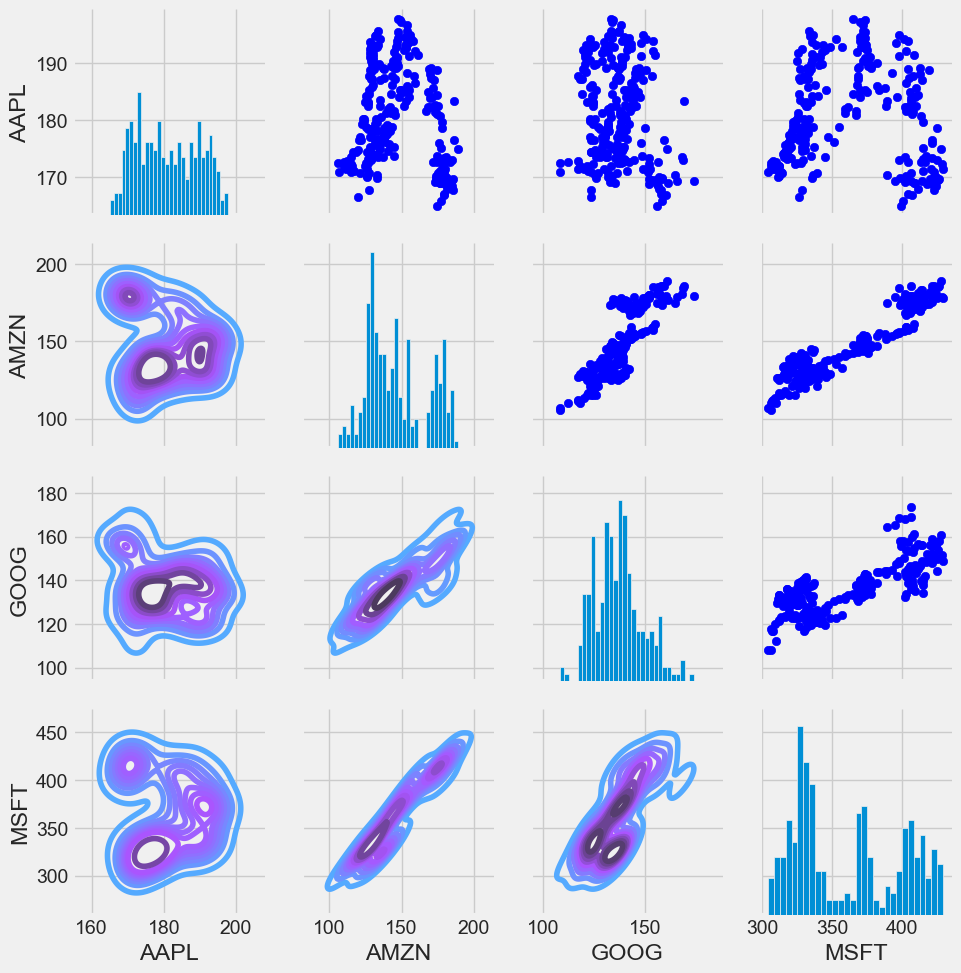

In [35]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='blue')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also create a correlation plot to determine the numerical values representing the correlation between the daily return values of the stocks. Upon analyzing the closing prices, an intriguing relationship between Microsoft and Apple is revealed.

Text(0.5, 1.0, 'Correlation of stock closing price')

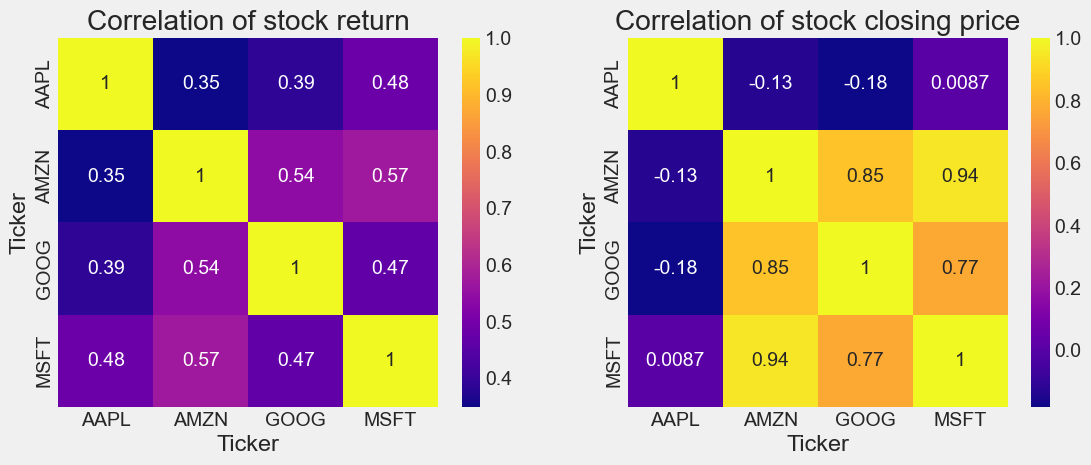

In [30]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='plasma')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='plasma')
plt.title('Correlation of stock closing price')

Upon reviewing our PairPlot analysis, it is evident both numerically and visually that Microsoft and Amazon exhibit the highest correlation in terms of daily stock return. Additionally, it is noteworthy that all technology companies display a positive correlation.

# Module 5: How much value do we put at risk by investing in a particular stock?

We have various methods to measure risk, with one of the simplest being to analyze the relationship between the expected return and the standard deviation of daily percentage returns that we have collected.

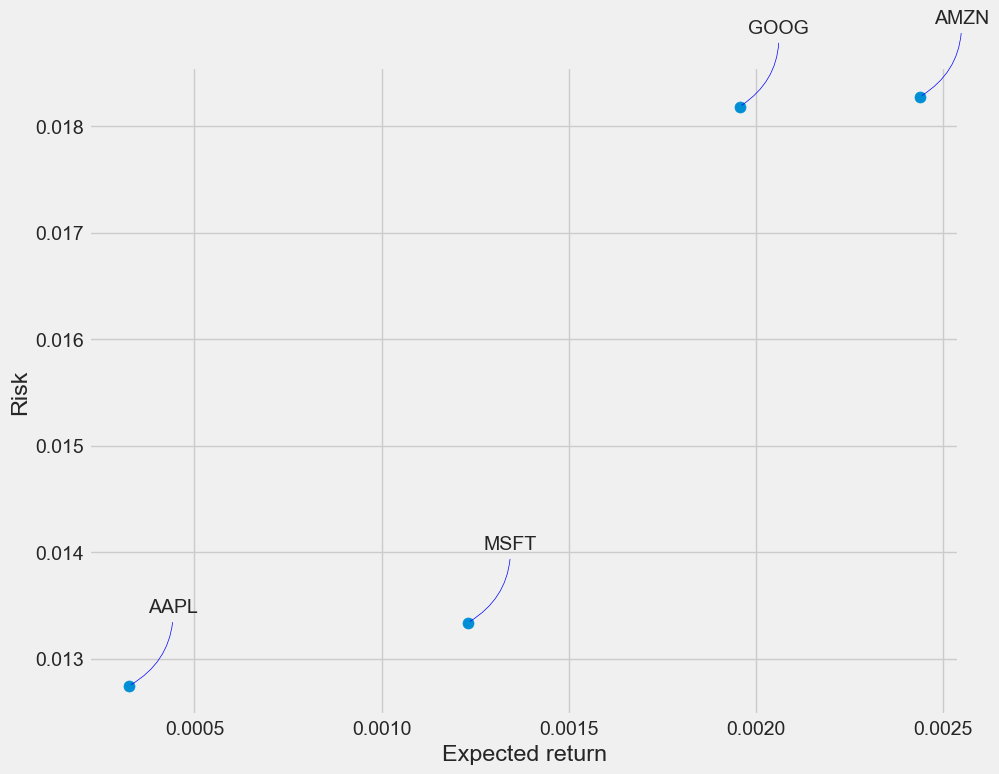

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Module 6: Predicting the closing price stock price of APPLE inc

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433827,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500645,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751299,394024400
...,...,...,...,...,...,...
2024-04-29,173.369995,176.029999,173.100006,173.500000,173.500000,68169400
2024-04-30,173.330002,174.990005,170.000000,170.330002,170.330002,65934800
2024-05-01,169.580002,172.710007,169.110001,169.300003,169.300003,50383100


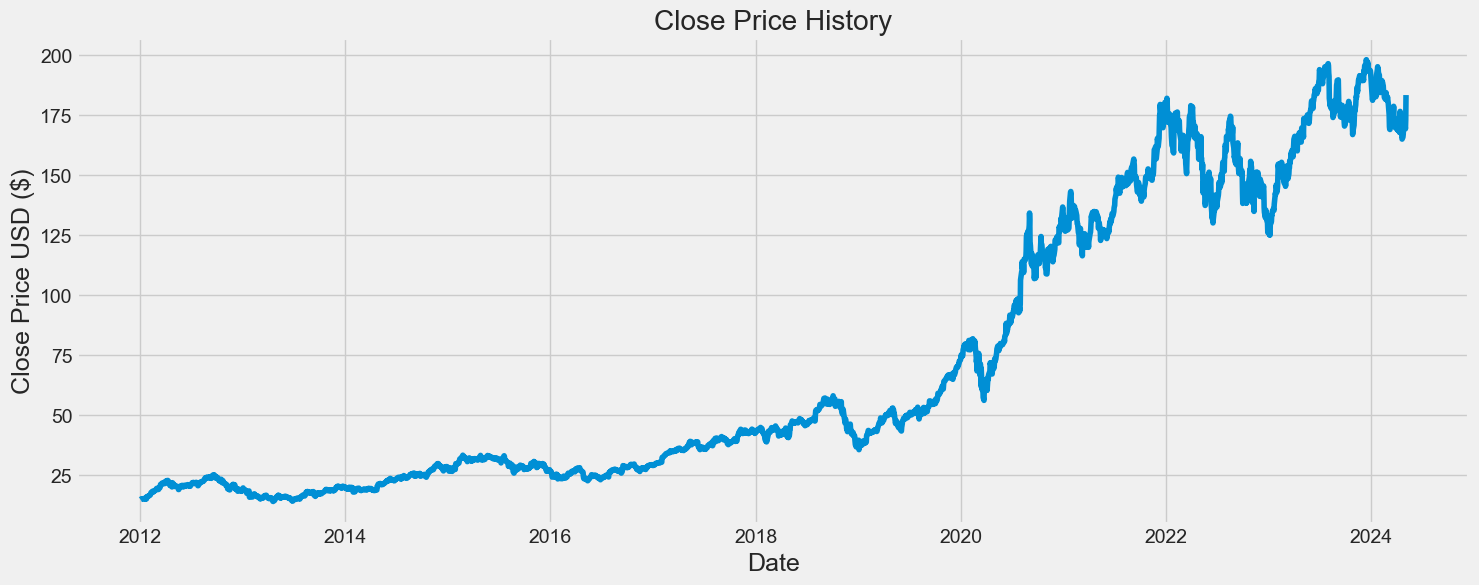

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2949

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.84356209],
       [0.86381591],
       [0.91990769]])

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2889/2889 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - loss: 0.0034


In [26]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


7.049744049468606

C:\Users\HP\AppData\Local\Temp\ipykernel_11588\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


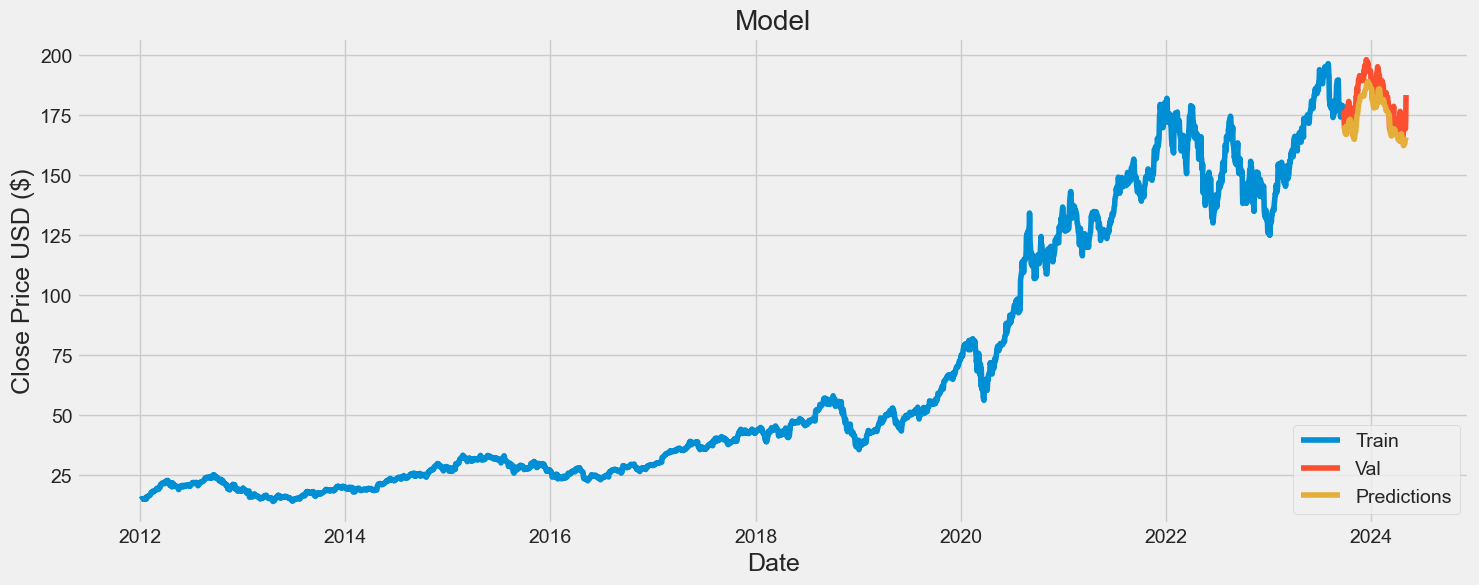

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-09-22,174.789993,170.679443
2023-09-25,176.080002,170.297852
2023-09-26,171.960007,170.195831
2023-09-27,170.429993,169.527008
2023-09-28,170.690002,168.519424
...,...,...
2024-04-29,173.500000,163.356644
2024-04-30,170.330002,164.459717
2024-05-01,169.300003,165.060272


## Summary